<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

В компании «Мегалайн» — федерального оператора сотовой связи, клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

###### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:

   * минута разговора: 3 рубля
   * сообщение: 3 рубля
   * 1 Гб интернет-трафика: 200 рублей

###### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:

   * минута разговора: 1 рубль
   * сообщение: 1 рубль
   * 1 Гб интернет-трафика: 150 рублей

# Описание данных

**Таблица calls (информация о звонках):**
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

**Таблица internet (информация об интернет-сессиях):**
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

**Таблица messages (информация о сообщениях):**
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

**Таблица tariffs (информация о тарифах):**
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Таблица users (информация о пользователях):**
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

## Изучение данных из файла

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import math        
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# открываем файл с данными
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
# выводим первые пять строк наших данных
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# смотрим общую информацию наших данных
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
# выводим первые пять строк наших данных
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
# смотрим общую информацию наших данных
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
# выводим первые пять строк наших данных
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
# смотрим общую информацию наших данных
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
# выводим первые пять строк наших данных
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
# смотрим общую информацию наших данных
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
# выводим первые пять строк наших данных
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
# смотрим общую информацию наших данных
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


###### Описание данных

###### Таблица calls (информация о звонках):
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

###### Таблица internet (информация об интернет-сессиях):
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

###### Таблица messages (информация о сообщениях):
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

###### Таблица tariffs (информация о тарифах):
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

###### Таблица users (информация о пользователях):
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

### Вывод

Из пяти таблиц данных только в одной - `users` есть пропущенные значения, но так-как их отсутствие не влияет на результат проверки гипотез, то можно не трогать этот столбец. Так же, необходимо в четырех таблицах поменять тп данных.

Предварительно можно утверждать, что, данных достаточно для исследования.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

In [14]:
# переводим дату в удобный формат
# calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y %m %dT%H:%M:%S')
DATETIME = '%Y %m %dT%H:%M:%S'
calls['call_date'] = pd.to_datetime(calls['call_date'], format=DATETIME)

In [15]:
# переводим продолжительность звонка в минуты и меняем тип данных
calls['duration_min'] = calls['duration'].apply(np.ceil).astype('int64')

In [16]:
# извлекаем месяц из даты
calls['month'] = calls['call_date'].dt.month

In [17]:
# переводим дату в удобный формат
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y %m %dT%H:%M:%S')

In [18]:
# меняем тип данных
internet['mb_used'] = internet['mb_used'].astype('int64')

In [19]:
# извлекаем месяц из даты
internet['month'] = internet['session_date'].dt.month

In [20]:
# переводим дату в удобный формат
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y %m %dT%H:%M:%S')

In [21]:
# извлекаем месяц из даты
messages['month'] = messages['message_date'].dt.month

In [22]:
# создаем новый датафрейм с соответствующими столбцами
total_frame = pd.DataFrame(columns = ['user_id'
                                      ,'month'
                                    ,'calls_count'
                                    ,'calls_sum'
                                   ,'messages_count'
                                   ,'internet_sum'])

In [23]:
# добаляем значения в новый датафрейм
# цикл с переменным проходящим по id-пользователям  
for user in users['user_id']:
    # цикл с переменным проходящим по месяцам 
    for m in range(1, 13):
        # если значение месяца присутствует в переведенный в нампай массиве звонков и сообщений, то считаем:
        if ((m in calls.query('user_id==@user')['month'].to_numpy()) 
            or (m in messages.query('user_id==@user')['month'].to_numpy())):
            
            calls_count = calls.query('user_id == @user and month == @m').shape[0] # количество звонков 
            calls_sum = calls.query('user_id == @user and month == @m')['duration_min'].sum() # сумму продолжительности звонков
            messages_count = messages.query('user_id == @user and month == @m').shape[0] # количество смс
            internet_sum = internet.query('user_id == @user and month == @m')['mb_used'].sum() # сумму использованного интернета
            # добавляем значения в новую таблицу
            total_frame = total_frame.append({'user_id':user,
                               'month':m,             
                               'calls_count':calls_count,
                               'calls_sum':calls_sum,
                               'messages_count':messages_count,
                               'internet_sum':internet_sum             
                                           }, ignore_index=True)

In [24]:
# смотрим общую информацию наших данных
total_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 6 columns):
user_id           3213 non-null object
month             3213 non-null object
calls_count       3213 non-null object
calls_sum         3213 non-null object
messages_count    3213 non-null object
internet_sum      3213 non-null object
dtypes: object(6)
memory usage: 150.7+ KB


In [25]:
# меняем тип данных для столбцов на соответсвущий 
total_frame['user_id'] = total_frame['user_id'].astype('int')
total_frame['month'] = total_frame['month'].astype('int')
total_frame['calls_count'] = total_frame['calls_count'].astype('int')
total_frame['messages_count'] = total_frame['messages_count'].astype('int')
total_frame['internet_sum'] = total_frame['internet_sum'].astype('int')

In [26]:
# добавляем в таблицу два дополнительных столбца
total_frame = total_frame.merge(users[['user_id','tariff']], on = 'user_id')
total_frame = total_frame.merge(users[['user_id','city']], on = 'user_id')

In [27]:
# функция для расчета помесячной выручки с каждого пользователя 
def get_income(row):
    # переменные для хранения выручки тарифа smart:
    calls_over_smart = 0 
    messages_over_smart = 0
    gb_over_smart = 0
    pay_smart = 0
    # переменные для хранения выручки тарифа ultra:
    calls_over_ultra = 0
    messages_over_ultra = 0
    gb_over_ultra = 0
    pay_ultra = 0
    # оператор для выручки тарифа smart
    if row['tariff']=='smart':
        if row['calls_sum'] > tariffs['minutes_included'][0]: 
            calls_over_smart = tariffs['rub_monthly_fee'][0]+(row['calls_sum'] - tariffs['minutes_included'][0])*tariffs['rub_per_minute'][0]
        else:
            calls_over_smart = tariffs['rub_monthly_fee'][0]
        if row['messages_count'] > tariffs['messages_included'][0]:
            messages_over_smart = (row['messages_count'] - tariffs['messages_included'][0])*tariffs['rub_per_message'][0]
        if row['internet_sum'] > tariffs['mb_per_month_included'][0]:
            gb_over_smart = (row['internet_sum'] - tariffs['mb_per_month_included'][0])*tariffs['rub_per_gb'][0]/1024
        pay_smart = (calls_over_smart + messages_over_smart + gb_over_smart)
        
        return pay_smart
    # оператор для выручки тарифа ultra
    if row['tariff']=='ultra':
        if row['calls_sum'] > tariffs['minutes_included'][1]: 
            calls_over_ultra = tariffs['rub_monthly_fee'][1]+(row['calls_sum'] - tariffs['minutes_included'][1])*tariffs['rub_per_minute'][1]
        else:
            calls_over_ultra = tariffs['rub_monthly_fee'][1]
        if row['messages_count'] > tariffs['messages_included'][1]:
            messages_over_ultra = (row['messages_count'] - tariffs['messages_included'][1])*tariffs['rub_per_message'][1]
        if row['internet_sum'] > tariffs['mb_per_month_included'][1]:
            gb_over_ultra = (row['internet_sum'] - tariffs['mb_per_month_included'][1])*tariffs['rub_per_gb'][1]/1024
        pay_ultra = (calls_over_ultra + messages_over_ultra + gb_over_ultra)
        
        return pay_ultra  

In [28]:
# новый столбец выручки
total_frame['payment'] = total_frame.apply(get_income, axis=1)

In [29]:
# выводим первые пять строк наших данных
total_frame.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,tariff,city,payment
0,1000,5,22,159,22,2252,ultra,Краснодар,1950.0
1,1000,6,43,172,60,23213,ultra,Краснодар,1950.0
2,1000,7,47,340,75,13988,ultra,Краснодар,1950.0
3,1000,8,52,408,81,14043,ultra,Краснодар,1950.0
4,1000,9,58,466,57,14556,ultra,Краснодар,1950.0


In [30]:
# смотрим общую информацию наших данных
total_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 3212
Data columns (total 9 columns):
user_id           3213 non-null int64
month             3213 non-null int64
calls_count       3213 non-null int64
calls_sum         3213 non-null object
messages_count    3213 non-null int64
internet_sum      3213 non-null int64
tariff            3213 non-null object
city              3213 non-null object
payment           3213 non-null float64
dtypes: float64(1), int64(5), object(3)
memory usage: 251.0+ KB


In [31]:
# изменяем тип данных
total_frame['calls_sum'] = total_frame['calls_sum'].astype('int')

### Вывод

По предобработке данных было:
* перевед даты в удобный формат,
* перевед продолжительности звонка в минуты,
* замена типа данных столбцов.

Помимо предобработки был создан новый датафрейм в который были добавлены такие столбцы как:
* `user_id` - уникальный идентификатор пользователя
* `month` - месяц года, в течении которого пользователь используют тариф 
* `calls_count` - количество звонков пользователя
* `calls_sum` - сумма продолжительности звонков
* `messages_count` - количество смс
* `internet_sum` - сумма использованного интернета
* `tariff` - вид тарифа
* `city` - город пользователя
* `payment` - помесячный платеж пользователя за свой тариф.

## Анализ данных

In [32]:
# посчитаем среднее количество, дисперсию и стандартное отклонение
total_frame.pivot_table(index = 'tariff', 
              values = ['calls_sum', 'messages_count', 'internet_sum','payment'], 
                        aggfunc = ['mean', 'median', 'var', 'std'])

mean                                              median  \
         calls_sum  internet_sum messages_count      payment calls_sum   
tariff                                                                   
smart   417.934948  16187.578735      33.384029  1227.543367     422.0   
ultra   527.158537  19469.871951      49.413618  2059.317835     518.5   

                                                           var                \
       internet_sum messages_count      payment      calls_sum  internet_sum   
tariff                                                                         
smart       16482.0             28   953.539062   36219.315784  3.437981e+07   
ultra       19292.5             38  1950.000000  100693.836489  1.013048e+08   

                                             std                               \
       messages_count        payment   calls_sum  internet_sum messages_count   
tariff                                                                          
smart      796.812958  614285.712829  190.313730   5863.430302      28.227876   
ultra     2285.109519  125052.914584  317.322921  10065.031021      47.802819   

                    
           payment  
tariff              
smart   783.763812  
ultra   353.628215

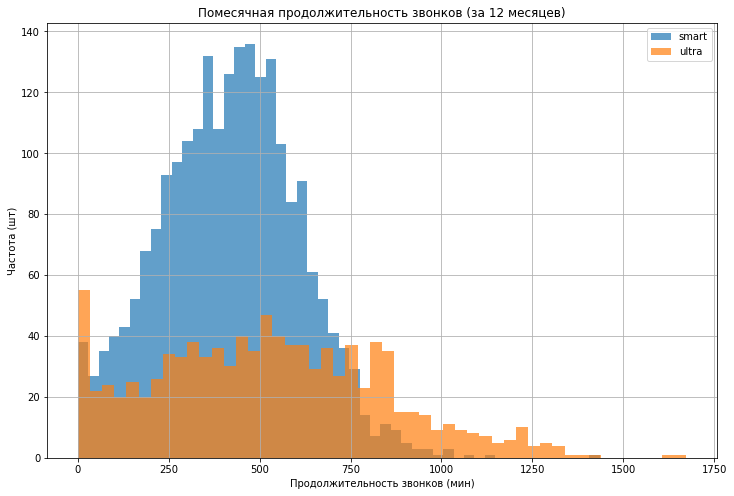

In [33]:
# построим гистограмму для суммы продолжительности звонков
calls_sum_smart = total_frame.loc[total_frame['tariff'] == 'smart']['calls_sum']
calls_sum_ultra = total_frame.loc[total_frame['tariff'] == 'ultra']['calls_sum']

ax = calls_sum_smart.plot(
    kind='hist',
    bins=50,
    alpha=0.7,
    label='smart',
    figsize=(12, 8)
)
calls_sum_ultra.plot(
    kind='hist',
    bins=50,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True
) 
plt.xlabel('Продолжительность звонков (мин)')
plt.ylabel('Частота (шт)')
plt.title('Помесячная продолжительность звонков (за 12 месяцев)')
plt.legend()
plt.show()



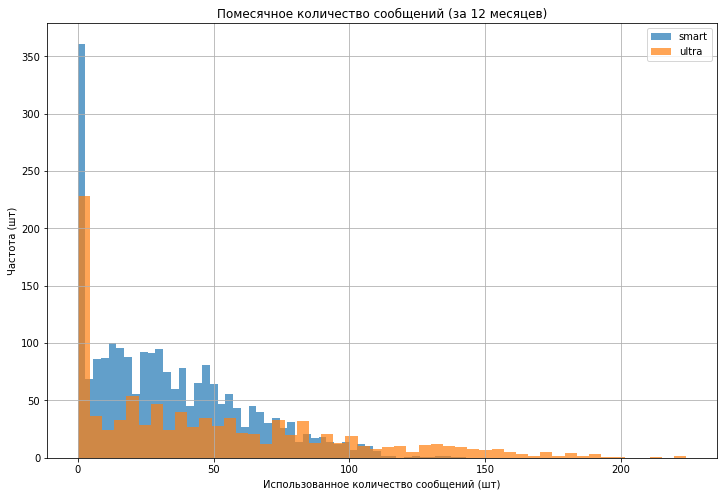

In [34]:
# построим гистограмму для количества смс
messages_count_smart = total_frame.loc[total_frame['tariff'] == 'smart']['messages_count']
messages_count_ultra = total_frame.loc[total_frame['tariff'] == 'ultra']['messages_count']

ax = messages_count_smart.plot(
    kind='hist',
    bins=50,
    alpha=0.7,
    label='smart',
    figsize=(12, 8)
)
messages_count_ultra.plot(
    kind='hist',
    bins=50,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
) 
plt.xlabel('Использованное количество сообщений (шт)')
plt.ylabel('Частота (шт)')
plt.title('Помесячное количество сообщений (за 12 месяцев)')
plt.legend()
plt.show()

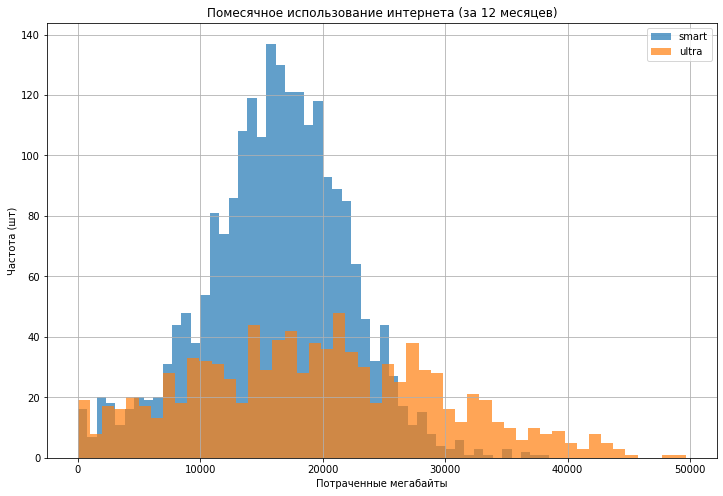

In [35]:
# построим гистограмму для суммы использованного инетернета
internet_sum_smart = total_frame.loc[total_frame['tariff'] == 'smart']['internet_sum']
internet_sum_ultra = total_frame.loc[total_frame['tariff'] == 'ultra']['internet_sum']

ax = internet_sum_smart.plot(
    kind='hist',
    bins=50,
    alpha=0.7,
    label='smart',
    figsize=(12, 8)
)
internet_sum_ultra.plot(
    kind='hist',
    bins=50,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
) 
plt.xlabel('Потраченные мегабайты')
plt.ylabel('Частота (шт)')
plt.title('Помесячное использование интернета (за 12 месяцев)')
plt.legend()
plt.show()

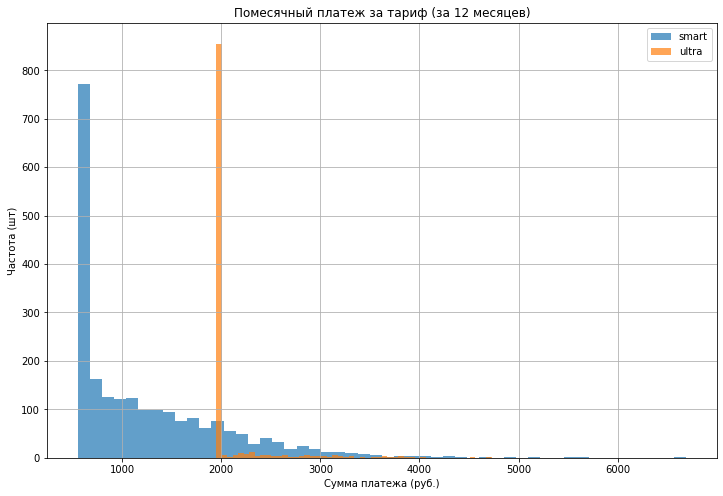

In [36]:
# построим гистограмму для помесячной выручки каждого пользователя
payment_smart = total_frame.loc[total_frame['tariff'] == 'smart']['payment']
payment_ultra = total_frame.loc[total_frame['tariff'] == 'ultra']['payment']

ax = payment_smart.plot(
    kind='hist',
    bins=50,
    alpha=0.7,
    label='smart',
    figsize=(12, 8)
)
payment_ultra.plot(
    kind='hist',
    bins=50,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
) 
plt.xlabel('Сумма платежа (руб.)')
plt.ylabel('Частота (шт)')
plt.title('Помесячный платеж за тариф (за 12 месяцев)')
plt.legend()
plt.show()

### Вывод

По гистограммам видно что скошенность у тарифа `ultra` положительная, а у `smart` отрицательная. Клиенты `smart` чаще используют сверхлимит, в свою очередь `ultra` наоборот не добирают до лимита.

## Проверка гипотез

Проверка гипотез:

1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Проверка первой гипотезы:

* H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;
* H1 - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.

In [37]:
payment_smart = total_frame.query('tariff == "smart"')['payment']
payment_ultra = total_frame.query('tariff == "ultra"')['payment']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    payment_smart, 
    payment_ultra)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.499021128238002e-194
Отвергаем нулевую гипотезу


Альтернативная гипотеза заключается в неравенстве средней выручки тарифов, а нулевая в равенстве.

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти 0%. Это явно слишком маленькая вероятность, соответсвенно отвергаем нулевую гипотезу и подтвеждаем альтернативную.

Проверка второй гипотезы:

* Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;
* Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [38]:
payment_in_msk = total_frame.query('city == "Москва"')['payment']
payment_not_in_msk = total_frame.query('city != "Москва"')['payment']

results = st.ttest_ind(
    payment_in_msk, 
    payment_not_in_msk,
    equal_var=False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.4591643006417385
Не получилось отвергнуть нулевую гипотезу


Альтернативная гипотеза заключается в неравенстве средней выручки пользователей из Москвы и других регионов, а нулевая в равенстве.

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти 40%. Это явно слишком большая вероятность, соответсвенно делаем вывод о низком различии средней выручки в Москве и регионах. 

## Общий вывод

Средние выручки тарифов смарт и ультра значимо различаются. В среднем пользователи тарифа ультра и смарт платят 2060 и 1230 рублей соответственно. Клиенты смарт чаще используют сверхлимит, в свою очередь ультра наоборот не добирают до лимита.

Средняя выручка по Москве и другим регионам значимо не различаются. Это значит, что цену на тарифы можно устанавливать одинаковую для всей страны. 

Общая продолжителньость звонков, количество сообщений, использованные магайбайты и платежи растут с начала года и до конца линейно. Это будет полезно при проведении рекламной кампании. 